In [15]:
%load_ext autoreload

%autoreload 2

import numpy as np
import collections

import matplotlib.pyplot as plt
from pymir import mpl_stylesheet
from pymir import mpl_utils
mpl_stylesheet.banskt_presentation(splinecolor = 'black', dpi = 300)

from gradvi.tests import toy_data
from gradvi.tests import toy_priors
from gradvi.inference import Trendfiltering
from gradvi.models import basis_matrix as gvbm
from gradvi.optimize import moving_average as gvma

from mrashpen.utils import R_trendfilter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
seed   = 105
n      = 1024
degree = 1
nknots = 10
strue  = 0.5 
knots  = np.linspace(0, 1, nknots+2)[1:-1]
x      = np.linspace(0, 1, n)
data   = toy_data.changepoint_from_bspline(x, knots, strue, degree = degree,
                signal = "normal", seed = seed, include_intercept = False)

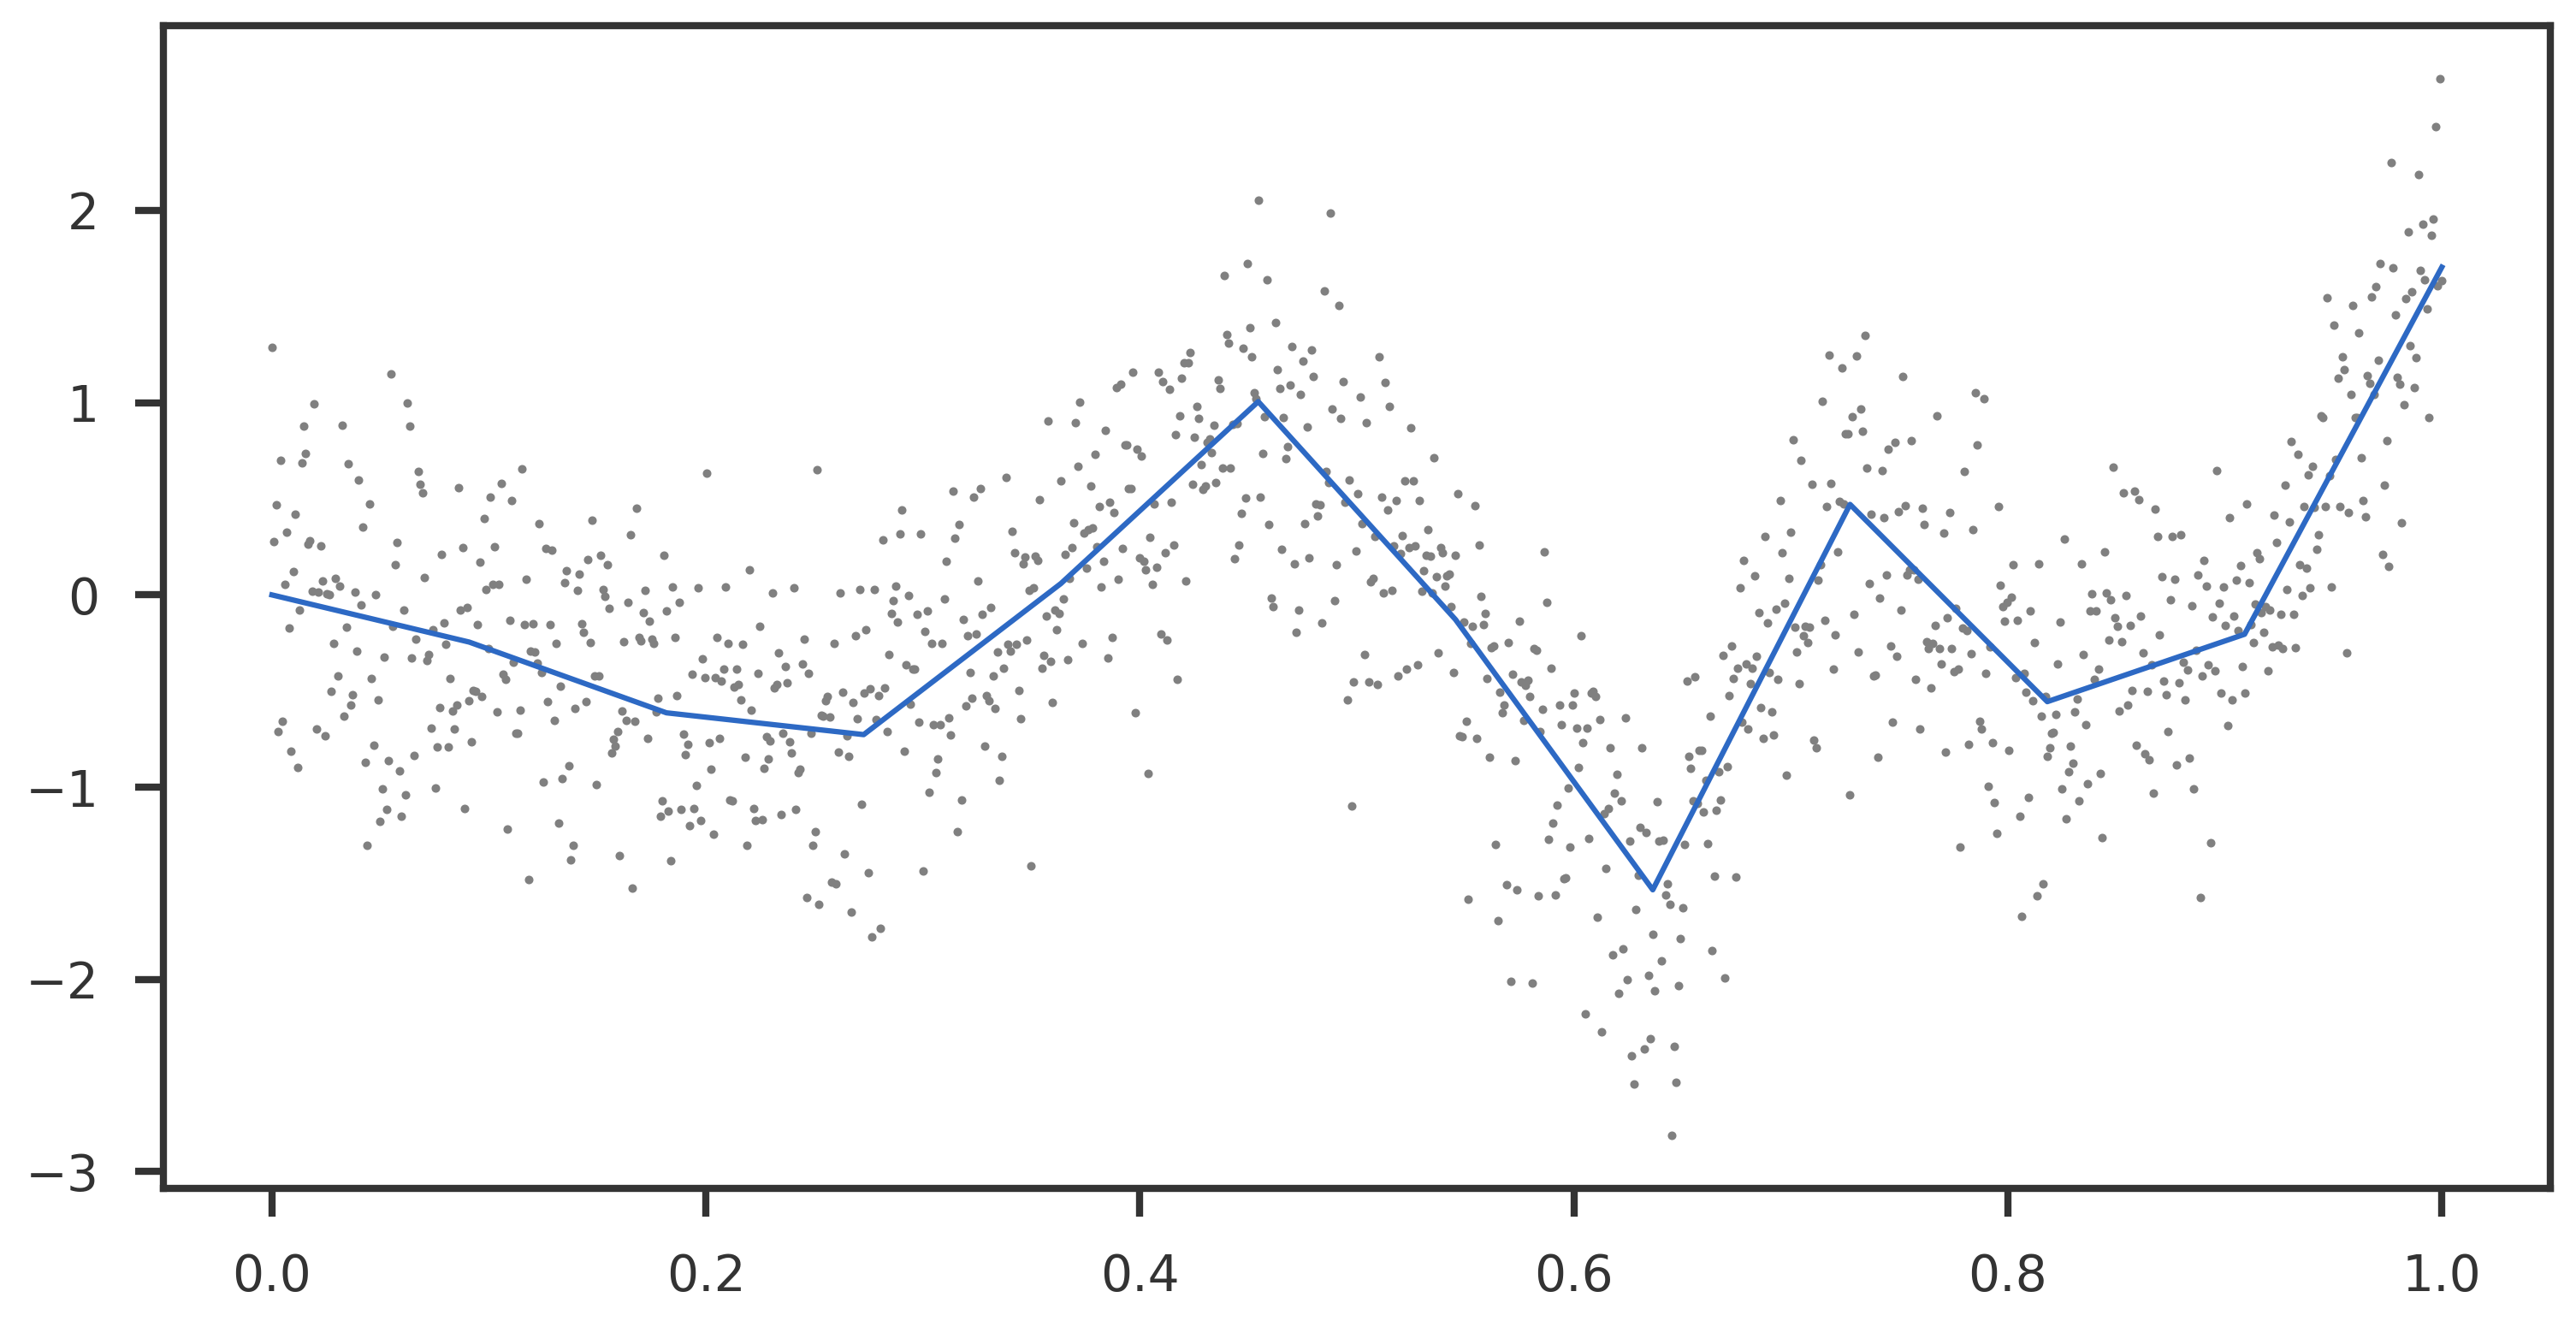

In [5]:
fig = plt.figure(figsize = (12, 6))
ax1 = fig.add_subplot(111)
ax1.scatter(data.x, data.y, s = 2, color = 'grey')
ax1.plot(data.x, data.ytrue)
plt.show()

In [11]:
prior = toy_priors.get_ash_scaled(k = 20, sparsity = 0.9, skbase = 20)

In [12]:
import gradvi

In [13]:
#%%debug

gv = Trendfiltering(maxiter = 200, obj = 'direct', scale_tfbasis = True)
gv.fit(data.y, data.degree, prior)

2022-11-14 10:56:49,028 | gradvi.optimize.root_find                | WARNING | ygrid is not strictly increasing. Removing grid points.
2022-11-14 10:56:49,062 | gradvi.optimize.root_find                | WARNING | ygrid is not strictly increasing. Removing grid points.
Catch runtimewarning
2022-11-14 10:56:49,136 | gradvi.normal_means.normal_means_from_posterior | ERROR   | Unexpected err=AttributeError("'NMAsh' object has no attribute '_logML_wderiv'"), type(err)=<class 'AttributeError'>


AttributeError: 'NMAsh' object has no attribute '_logML_wderiv'

In [9]:
gv.ypred

array([0.2078998 , 0.22199515, 0.22063551, ..., 1.93337009, 2.00219385,
       2.10555542])